## Support Vector Machine(SVM):
- Main Objective : to categorize the data into two classes,
- It does so by finding a decision boundary or separating hyperplanes,
- Hyperplanes lies precisely between two closes points of both classes, maximizing the distance between itself and data points.

Steps:
- Start off by drawing hyperplane that separates the two classes randomly.
- Then, check the distance between hyperplane and closest data points from each class.
- The hyperplane which has maximum distance from support vectors is most optimum.

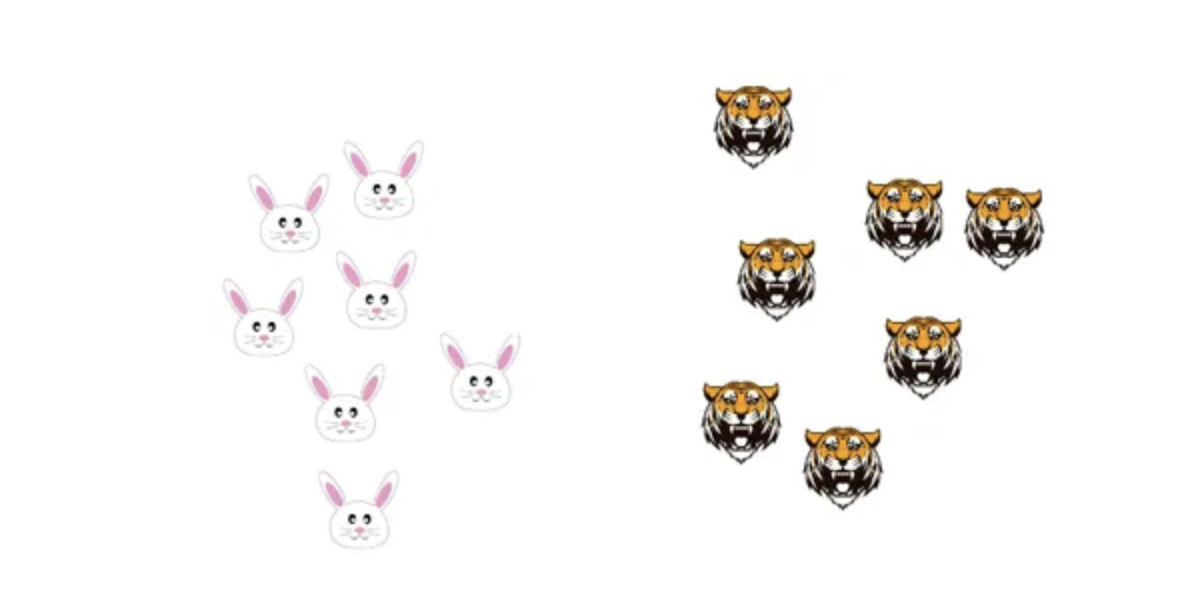

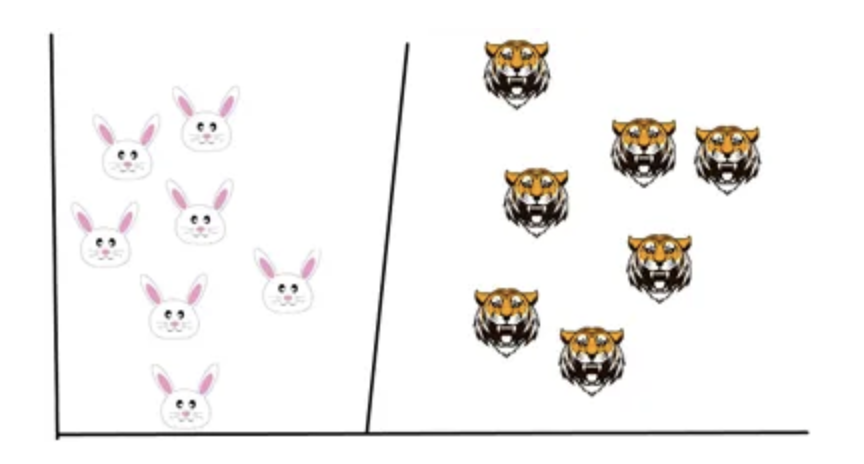

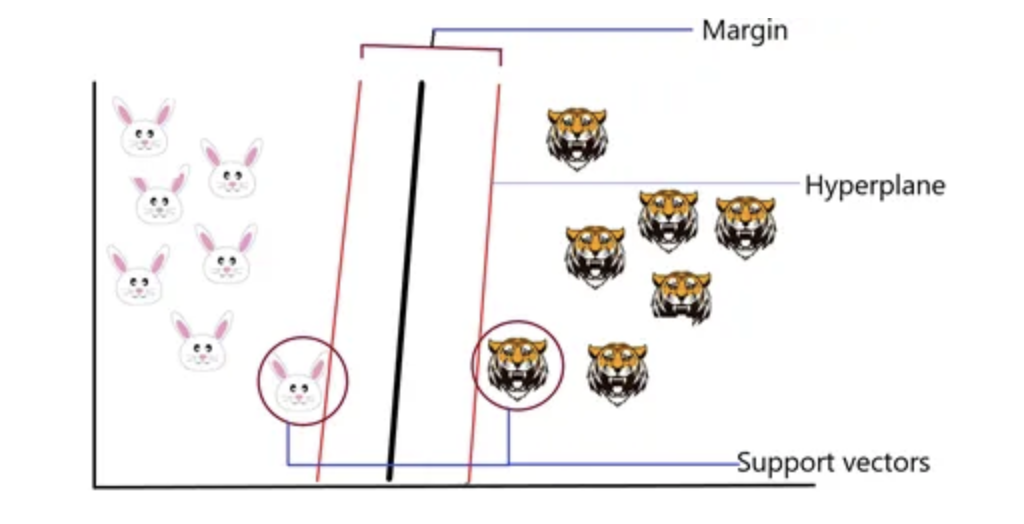

- When new data point is introduced:
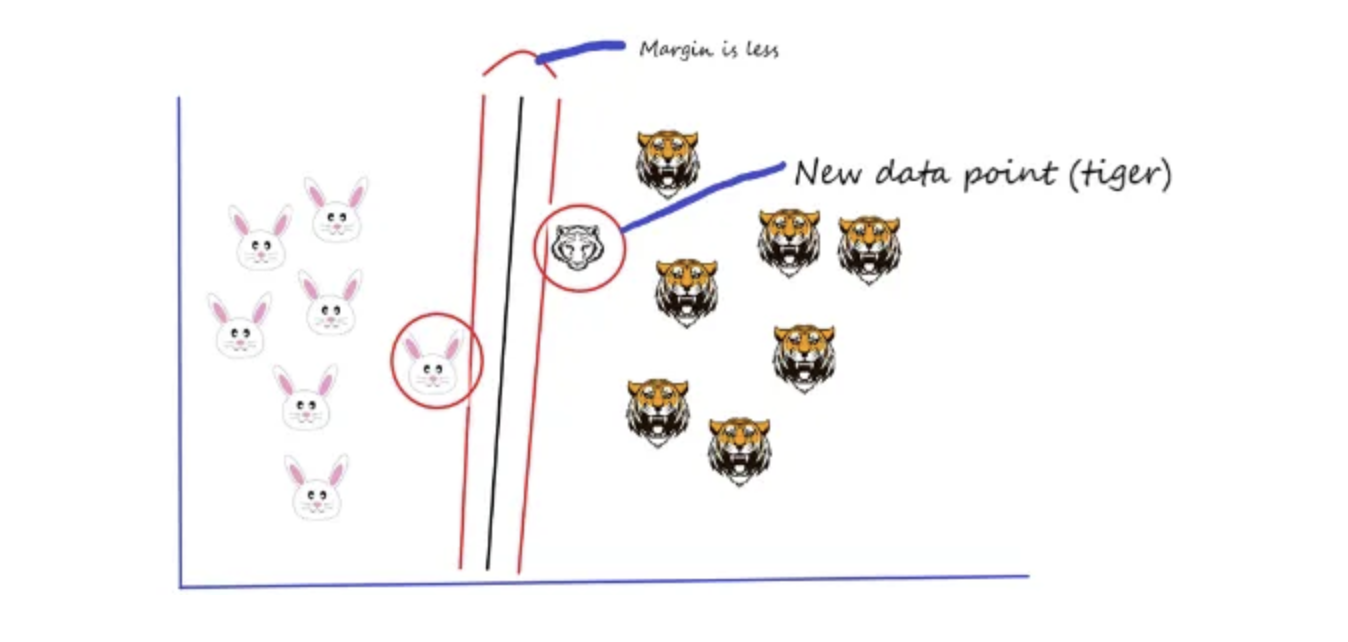

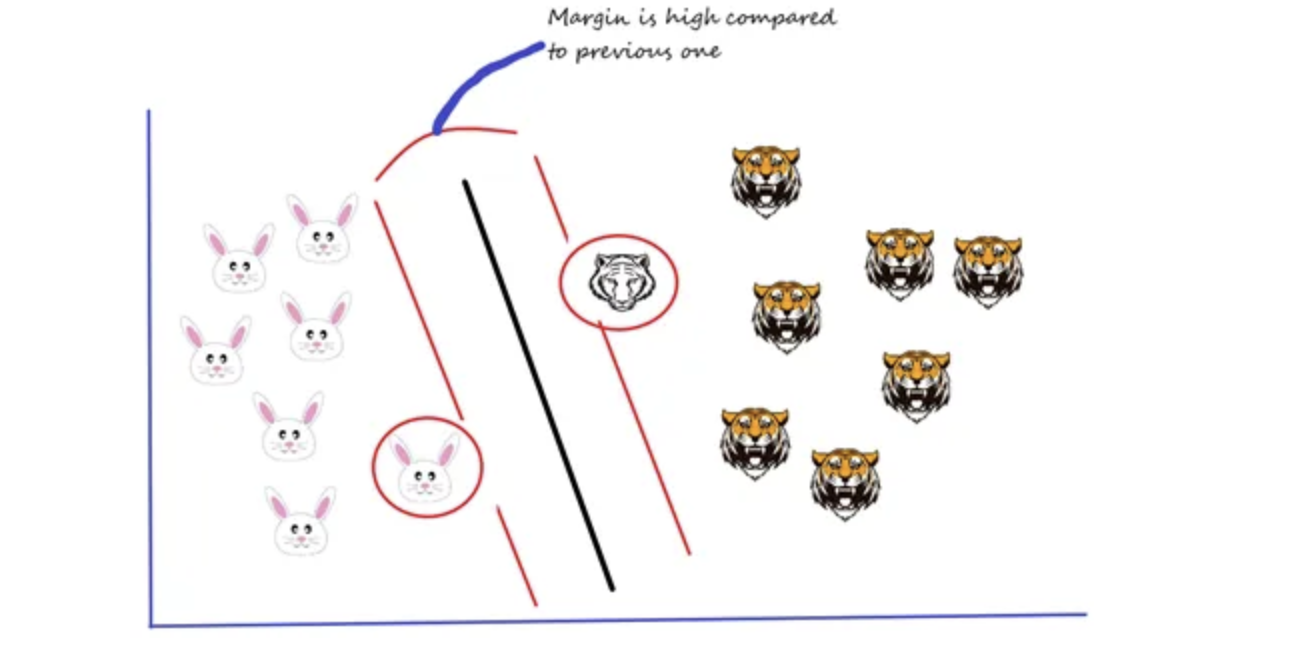

What if data is non-linear?

- In that case we use non-linear SVM,
- Kernel functions are used that tranasforms the data into another dimension whenre data can be spearated in different classes.

#### Loading data and EDA:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#load the iris data
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
#create dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#adding target columns
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
#adding the flower names
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x] )
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
#sepcies
df0 = df[df.target ==0]
df1 = df[df.target ==1]
df2 = df[df.target ==2]

df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


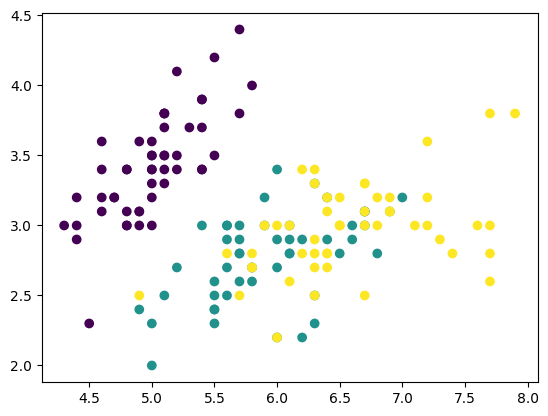

In [18]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c = df['target'])
plt.show()

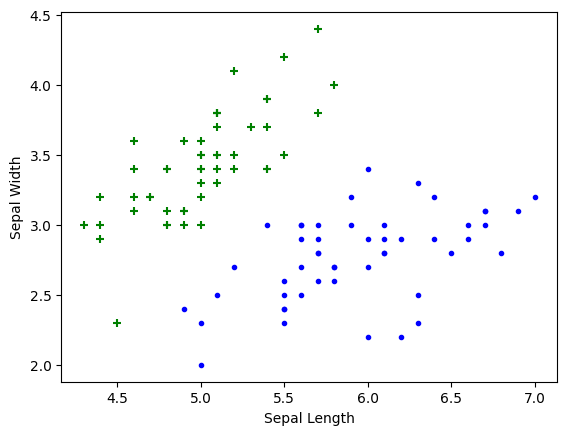

In [14]:
#visualization of species with their features
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'green',
            marker ='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'blue',
            marker ='.')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.show()

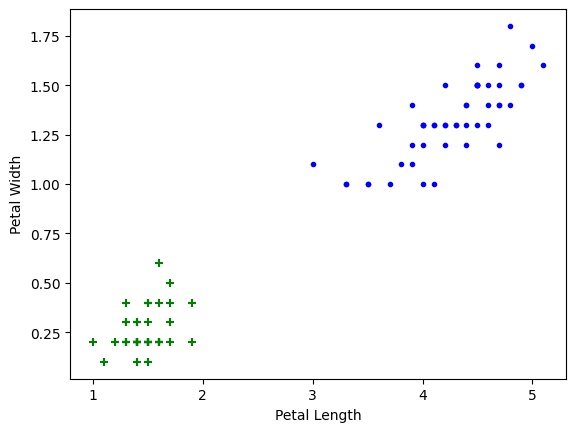

In [15]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'green',
            marker ='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'blue',
            marker ='.')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

#### Builidng the SVM Model:

In [19]:
#prepare data for model

from sklearn.model_selection import train_test_split


In [20]:
X = df.drop(['target','flower_names'], axis = 'columns')
y = df.target

In [21]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [23]:
#split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                    random_state = 0)

In [65]:
#import the SVC

from sklearn.svm import SVC

#initialize the model

model = SVC()

#fit the model

model.fit(X_train, y_train)

SVC()

In [63]:
#predict
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [64]:
#score
model.score(X_test, y_test)

0.9777777777777777

In [35]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test,y_pred)

0.9777777777777777

In [38]:
#predict on new data
model.predict([[4.8,3.0,1.5,0.3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

#### Tuning the parameters:

1. Regularization(C):
- It decides how much you wan to penalize the misclassification data points.
- Low C: Simplicity, High C : prioritize few mistakes

In [45]:
model_c = SVC(C = 10)
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

0.9777777777777777

In [46]:
model_c = SVC(C = 100)
model_c.fit(X_train,y_train)
model_c.score(X_test,y_test)

0.9777777777777777

2. Kernel:
-  linear, rbf, polynomial, sigmoid
- rbf and polynomial are used for non linear,
- default : rbf

In [58]:
model_k_linear = SVC(kernel = 'linear')
model_k_linear.fit(X_train, y_train)
model_k_linear.score(X_test,y_test)

0.9777777777777777

In [56]:
model_k_poly = SVC(kernel = 'poly', C = 10, gamma = 10)
model_k_poly.fit(X_train, y_train)
model_k_poly.score(X_test,y_test)

0.9777777777777777

In [51]:
model_k_sigmoid = SVC(kernel = 'sigmoid')
model_k_sigmoid.fit(X_train, y_train)
model_k_sigmoid.score(X_test,y_test)

0.24444444444444444

3. Gamma:
- It is the coefficient for kernel parameters
- High gamma : high complexity of model
- Low gamma : low complexity

In [53]:
model_g = SVC(gamma = 1)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9777777777777777

In [55]:
model_g = SVC(gamma = 10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9333333333333333

Resources:

1.[Support Vector Machine](https://youtu.be/N1vOgolbjSc)